<a href="https://colab.research.google.com/github/amirsartipi13/DM-P3-Clustering/blob/master/DM_P3_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# 3D plot

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
def D3_plot(X,label, index=[0,1,2]):
  fig = plt.figure(figsize = (16, 9))
  ax = plt.axes(projection="3d")

  z_line = np.linspace(0, 15, 1000)
  x_line = np.cos(z_line)
  y_line = np.sin(z_line)
  ax.plot3D(x_line, y_line, z_line, 'gray')

  ax.scatter3D(list(X[label == 0, index[0]]), list(X[label == 0 , index[1]]), list(X[label == 0 , index[2]]), s=100, c='red',  label='0')
  ax.scatter3D(list(X[label == 1, index[0]]), list(X[label == 1 , index[1]]), list(X[label == 1 , index[2]]), s=100, c='blue',  label='1')
  ax.scatter3D(list(X[label == 2, index[0]]), list(X[label == 2 , index[1]]), list(X[label == 2 , index[2]]), s=100, c='green',  label='2')
  ax.scatter3D(list(X[label == 3, index[0]]), list(X[label == 3 , index[1]]), list(X[label == 3 , index[2]]), s=100, c='cyan',  label='3')
  ax.scatter3D(list(X[label == 4, index[0]]), list(X[label == 4 , index[1]]), list(X[label == 4 , index[2]]), s=100, c='purple',  label='4')
  ax.scatter3D(list(X[label == 5, index[0]]), list(X[label == 5 , index[1]]), list(X[label == 5 , index[2]]), s=100, c='yellow',  label='5')
  plt.show()

# 2D plot

In [ ]:
def D2_plot(X, label, index=[0,1], centroid=None):
  plt.scatter(X[label == 0, index[0]], X[label == 0 , index[1]], s=100, c='red',  label='0')
  plt.scatter(X[label == 1, index[0]], X[label == 1 , index[1]], s=100, c='green',  label='1')
  plt.scatter(X[label == 2, index[0]], X[label == 2 , index[1]], s=100, c='blue',  label='2')
  plt.scatter(X[label == 3, index[0]], X[label == 3 , index[1]], s=100, c='cyan',  label='3')
  plt.scatter(X[label == 4, index[0]], X[label == 4 , index[1]], s=100, c='magenta',  label='4')
  plt.scatter(X[label == 5, index[0]], X[label == 5 , index[1]], s=100, c='yellow',  label='5')
  if centroid:
    plt.scatter(centroid.cluster_centers_[:,0], centroid.cluster_centers_[:,1], s=300, c='black',  label='centroid')
  plt.title('Cluster Stars')

# Preprocess data

In [ ]:
df = pd.read_csv('/content/drive/My Drive/data_sets/DM-Clustering/Stars.csv')

In [ ]:
df

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


In [ ]:
df['Color'].unique(), df['Spectral_Class'].unique()

(array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
        'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
        'yellow-white', 'Orange', 'White-Yellow', 'white', 'yellowish',
        'Yellowish', 'Orange-Red', 'Blue-White'], dtype=object),
 array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object))

In [ ]:
X = df.drop('Type', axis=1)
X = df.iloc[:,:].values
label = df['Type'].values
X

array([[3068, 0.0024, 0.17, ..., 'Red', 'M', 0],
       [3042, 0.0005, 0.1542, ..., 'Red', 'M', 0],
       [2600, 0.0003, 0.102, ..., 'Red', 'M', 0],
       ...,
       [8829, 537493.0, 1423.0, ..., 'White', 'A', 5],
       [9235, 404940.0, 1112.0, ..., 'White', 'A', 5],
       [37882, 294903.0, 1783.0, ..., 'Blue', 'O', 5]], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
color_encoder = LabelEncoder()
X[:, 4] = color_encoder.fit_transform(X[:, 4])
X[:, 5] = color_encoder.fit_transform(X[:, 5])


In [ ]:
D3_plot(X, label, [3,0,2])

# preprocessing

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


**PCA**

In [ ]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)

# **K-means**


In [ ]:
from sklearn.cluster import KMeans 

In [ ]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, random_state=0, n_init=10)
y_kmeans = kmeans.fit_predict(X)

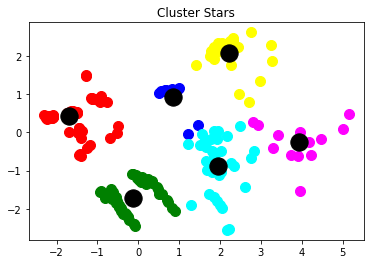

In [ ]:
D2_plot(X, y_kmeans, centroid=kmeans)

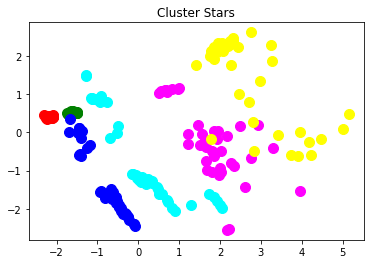

In [ ]:
D2_plot(X, label) 

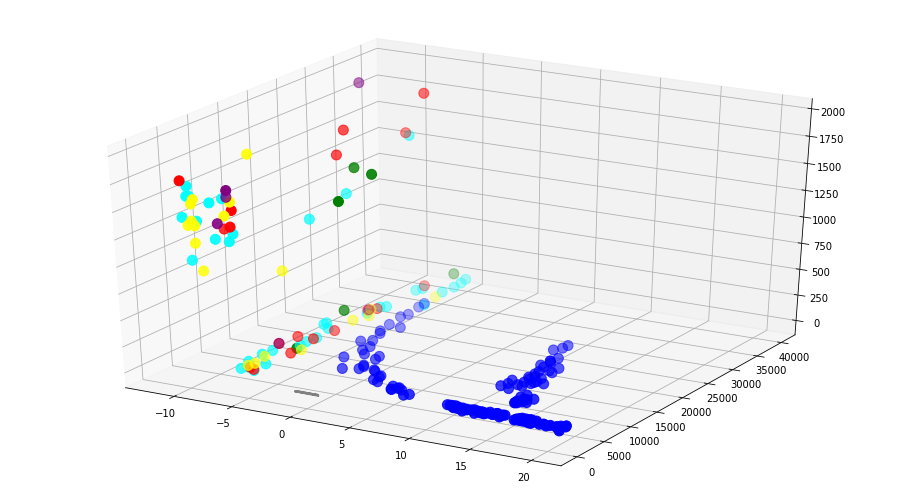

In [ ]:
D3_plot(X, y_kmeans, [3,0,2])

In [ ]:
kmeans_0, kmeans_1, kmeans_2, kmeans_3, kmeans_4, kmeans_5 = [[] for i in range(6)]
for i in range(len(label)):
  if y_kmeans[i] == 0:
    kmeans_0.append(label[i])
  if y_kmeans[i] == 1:
    kmeans_1.append(label[i])
  if y_kmeans[i] == 2:
    kmeans_2.append(label[i])
  if y_kmeans[i] == 3:
    kmeans_3.append(label[i])
  if y_kmeans[i] == 4:
    kmeans_4.append(label[i])
  if y_kmeans[i] == 5:
    kmeans_5.append(label[i])


In [ ]:
from collections import Counter
Counter(kmeans_0).most_common(), Counter(kmeans_1).most_common(), Counter(kmeans_2).most_common(), \
Counter(kmeans_3).most_common(), Counter(kmeans_4).most_common(), Counter(kmeans_5).most_common()

([(0, 40), (1, 40), (3, 14), (2, 13)],
 [(2, 27), (3, 20)],
 [(4, 11)],
 [(4, 26), (3, 6), (5, 2)],
 [(5, 10), (4, 3)],
 [(5, 28)])

# **Hierachichal**


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score

In [ ]:
hc = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
y_hic = hc.fit_predict(X)

In [ ]:
dbs = davies_bouldin_score(X, y_hic)
dbs

0.40715349034164167

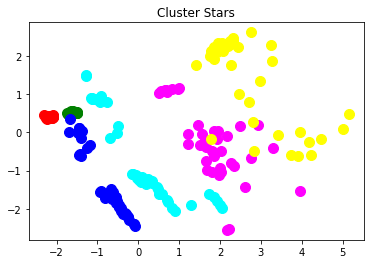

In [ ]:
D2_plot(X, label)

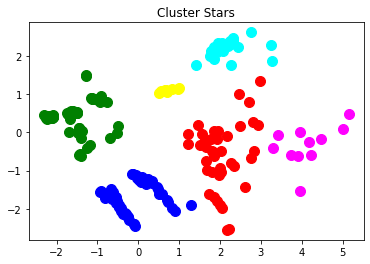

In [ ]:
D2_plot(X, y_hic)

In [ ]:
hic_0, hic_1, hic_2, hic_3, hic_4, hic_5 = [[] for i in range(6)]
for i in range(len(label)):
  if y_hic[i] == 0:
    hic_0.append(label[i])
  if y_hic[i] == 1:
    hic_1.append(label[i])
  if y_hic[i] == 2:
    hic_2.append(label[i])
  if y_hic[i] == 3:
    hic_3.append(label[i])
  if y_hic[i] == 4:
    hic_4.append(label[i])
  if y_hic[i] == 5:
    hic_4.append(label[i])

In [ ]:
from collections import Counter
Counter(hic_0).most_common(), Counter(hic_1).most_common(), Counter(hic_2).most_common(), \
Counter(hic_3).most_common(), Counter(hic_4).most_common(), Counter(hic_5).most_common()

([(4, 29), (5, 6), (3, 5)],
 [(0, 40), (1, 40), (3, 14), (2, 13)],
 [(2, 27), (3, 21)],
 [(5, 25)],
 [(4, 11), (5, 9)],
 [])

# DB Scan

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=6)
y_dbscan = dbscan.fit_predict(X)


In [ ]:
dbscan_0, dbscan_1, dbscan_2, dbscan_3, dbscan_4, dbscan_5 = [[] for i in range(6)]
for i in range(len(label)):
  if y_dbscan[i] == 0:
    dbscan_0.append(label[i])
  if y_dbscan[i] == 1:
    dbscan_1.append(label[i])
  if y_dbscan[i] == 2:
    dbscan_2.append(label[i])
  if y_dbscan[i] == 3:
    dbscan_3.append(label[i])
  if y_dbscan[i] == 4:
    dbscan_4.append(label[i])
  if y_dbscan[i] == 5:
    dbscan_5.append(label[i])

In [ ]:
from collections import Counter
Counter(dbscan_0).most_common(), Counter(dbscan_1).most_common(), Counter(dbscan_2).most_common(), \
Counter(dbscan_3).most_common(), Counter(dbscan_4).most_common(), Counter(dbscan_5).most_common()

([(0, 40), (1, 40), (2, 13)],
 [(2, 27)],
 [(3, 21)],
 [(3, 9)],
 [(4, 9)],
 [(5, 23)])

In [ ]:
D3_plot(X, y_dbscan, index=[3,0,1])

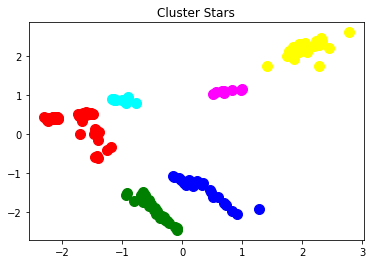

In [ ]:
D2_plot(X, y_dbscan)

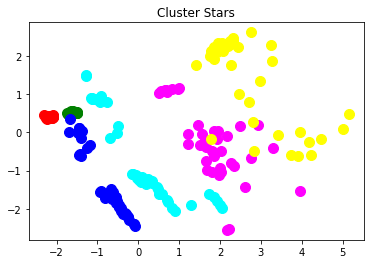

In [ ]:
D2_plot(X, label)